In [3]:
import pandas as pd
# import matplotlib.pyplot as plt <-- error not found -___- ugh fix it Olivia

# Load dataset
df = pd.read_csv("311_noise_complaints_sample_small.csv")

# Preview the data
print(df.shape)
df.head()

(20000, 41)


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,65213897,2025-06-09T12:51:30.000,2025-06-11T13:30:50.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11369.0,87-04 31 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.759730,-73.881220,"\n, \n(40.75972962354946, -73.88121963439833)"
1,65202348,2025-06-08T23:48:33.000,2025-06-09T00:09:22.000,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10453.0,40 RICHMOND PLAZA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.852196,-73.922327,"\n, \n(40.8521960366985, -73.92232722755996)"
2,65271096,2025-06-15T15:18:38.000,2025-06-15T19:24:01.000,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,229 SEAMAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.871239,-73.918899,"\n, \n(40.87123914834134, -73.91889895540905)"
3,65214828,2025-06-09T11:11:29.000,NaN,HPD,Department of Housing Preservation and Develop...,APPLIANCE,REFRIGERATOR,RESIDENTIAL BUILDING,10128.0,1845 1 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.782820,-73.945045,"\n, \n(40.782819840288106, -73.94504513362945)"
4,65190650,2025-06-07T17:56:28.000,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Parking Lot/Garage,11218.0,344 CONEY ISLAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.649497,-73.971761,"\n, \n(40.649497274437046, -73.97176123316513)"


In [2]:
# Focus on noise complaints
noise_df = df[df['complaint_type'].str.contains("Noise", na=False)]

# Preview counts
print("Noise complaints:", noise_df.shape[0])
print("Top complaint types:")
print(noise_df['complaint_type'].value_counts().head())

Noise complaints: 27253
Top complaint types:
complaint_type
Noise - Residential        12119
Noise - Street/Sidewalk     8340
Noise - Commercial          2362
Noise                       1704
Noise - Vehicle             1700
Name: count, dtype: int64


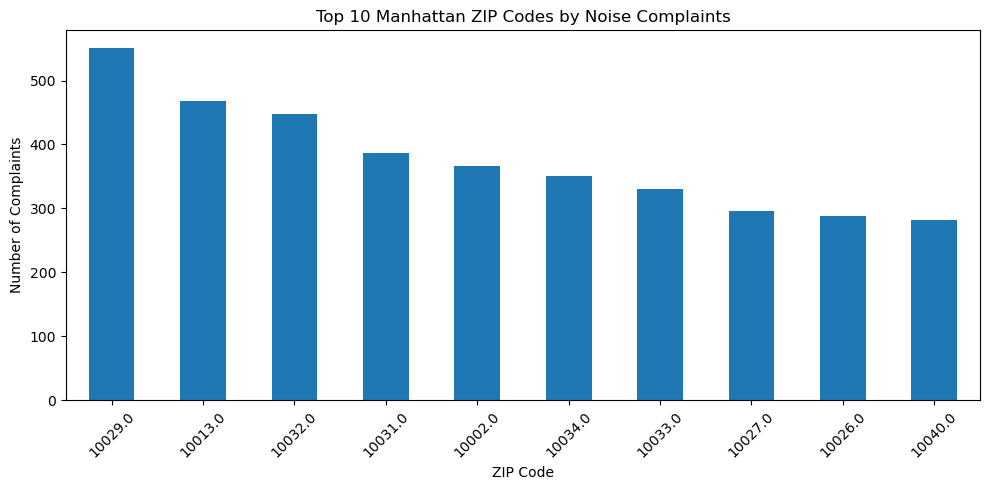

In [3]:
# Manhattan-only
manhattan_df = noise_df[noise_df['borough'].str.upper() == "MANHATTAN"]

# Group by ZIP code
zip_counts = manhattan_df['incident_zip'].value_counts().head(10)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
zip_counts.plot(kind="bar")
plt.title("Top 10 Manhattan ZIP Codes by Noise Complaints")
plt.xlabel("ZIP Code")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()